<a href="https://colab.research.google.com/github/kashishthakur26/Natural_language_processing/blob/main/spam_text_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam text classification

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as pd
import numpy as np

In [3]:
x = ['which book is this','this is book and this is math']

In [4]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [7]:
count.toarray()


array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [9]:
bow = pd.DataFrame(count.toarray())

In [10]:
bow

,0,1,2,3,4,5
0,0,1,1,0,1,1
1,1,1,2,1,2,0


## Term Frequency

In [13]:
import tensorflow as tf
bow.shape

(2, 6)

## Load Spam Dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Colab-notebooks/spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [20]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [21]:
df.shape

(5572, 4)

In [22]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Balance dataset

In [23]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [24]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [25]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [26]:
ham = ham.sample(spam.shape[0])

In [27]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [28]:
data = ham.append(spam , ignore_index=True)

<ipython-input-28-4cee8c7d7a10>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam , ignore_index=True)


In [29]:
data.sample(5)

,label,message,length,punct
358,ham,What u mean u almost done? Done wif sleeping? ...,141,7
152,ham,"I need an 8th but I'm off campus atm, could I ...",72,3
965,spam,Our brand new mobile music service is now live...,157,3
873,spam,Do you want 750 anytime any network mins 150 t...,149,0
1230,spam,Congratulations YOU'VE Won. You're a Winner in...,114,6


In [30]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

## EDA

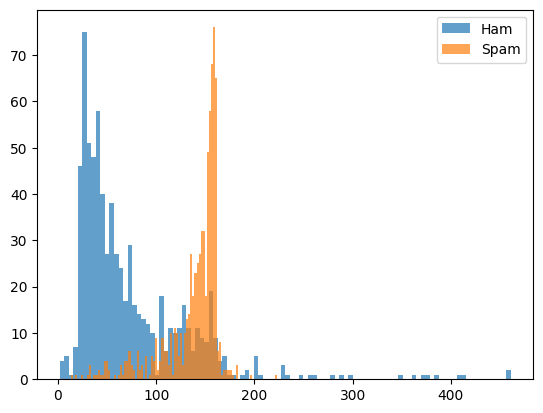

In [31]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

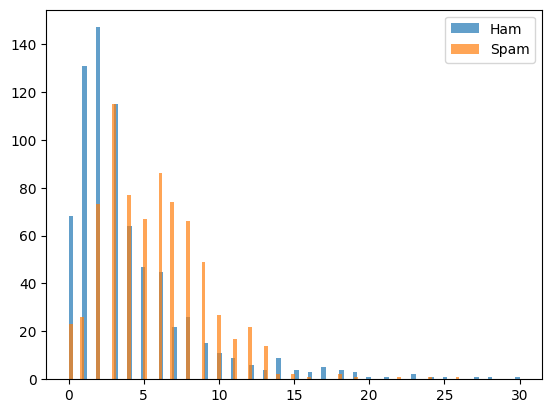

In [32]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

## Data preparation for training

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
data.head()

,label,message,length,punct
0,ham,Do well :)all will for little time. Thing of g...,62,4
1,ham,Eh u remember how 2 spell his name... Yes i di...,81,5
2,ham,Will you come online today night,32,0
3,ham,Well the weather in cali's great. But its comp...,188,7
4,ham,I'm wif him now buying tix lar...,33,4


In [36]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])

In [37]:
X = X.toarray()

In [38]:
X.shape

(1494, 4655)

In [39]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [41]:
X_train.shape, X_test.shape

((1195, 4655), (299, 4655))

## Training Your First Text Classifier

In [42]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 15, 134]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       150
        spam       1.00      0.90      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



## SVM

In [47]:
clf = SVC(C = 1000 , gamma = 'auto')

In [48]:
clf.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [49]:
y_pred = clf.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred)

array([[149,   1],
       [ 18, 131]])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       150
        spam       0.99      0.88      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



### Test Model with Real Data

In [52]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred

In [53]:
predict('hey, whassup')

array(['ham'], dtype=object)

In [54]:
predict('you have got free tickets to the usa this summer')

array(['spam'], dtype=object)